# Capítulo 13
# Projeto 2

# Objetivo

O objetivo do Projeto 2 é responder 10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

# Dados

Os dados são reais e foram extraídos do link abaixo:

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

Fizemos algumas simplificações no dataset e entregaremos o arquivo a você em formato CSV junto com os demais arquivos do capítulo.

# Perguntas de negócio

Vamos analisar os dados e então responderemos essas 10 perguntas:

* **Pergunta de Negócio 1:** Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?
* **Pergunta de Negócio 2:** Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.
* **Pergunta de Negócio 3:** Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.
* **Pergunta de Negócio 4:** Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.
* **Pergunta de Negócio 5:** Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.
* **Pergunta de Negócio 6 (Desafio Nível Baby):** Qual o Total de Vendas Por Segmento e Por Ano?
* **Pergunta de Negócio 7 (Desafio Nível Júnior):** Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:
    * Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
    * Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
    * Quantas Vendas Receberiam 15% de Desconto?
* **Pergunta de Negócio 8 (Desafio Nível Master):** Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?
* **Pergunta de Negócio 9 (Desafio Nível Master Ninja):** Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.
* **Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):** Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico.

# Instruções

1. Importe as bibliotecas necessárias.
2. Carregue o arquivo CSV com os dados.
3. Responda as perguntas de negócio.
4. Salve os resultados em um arquivo.


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

##Carregando os dados

In [ ]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [ ]:
# Shape
df_dsa.shape

(9700, 11)

In [ ]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [ ]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [ ]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [ ]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [ ]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [ ]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Pergunta de Negócio 1: Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [ ]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
# Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_dsa_p1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

# Em seguida agrupamos por cidade e calculamos o total de valor_venda
df_dsa_p1_total = df_dsa_p1.groupby('Cidade')['Valor_Venda'].sum()

# Então encontramos a cidade com maior valor de venda
cidade_maior_venda = df_dsa_p1_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies': ", cidade_maior_venda)

Cidade com maior valor de venda para 'Office Supplies':  New York City


In [ ]:
#Para conferir o resultado:
df_dsa_p1_total.sort_values(ascending=False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2: Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

Obs: Estamos tratando da data do pedido como variável categórica e não como série temporal. Se a pergunta fosse "ao longo do tempo" essa resposta não seria a ideal.

In [ ]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
# Calculamos o total de vendas para cada data de pedido
df_dsa_p2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
df_dsa_p2.head()



Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

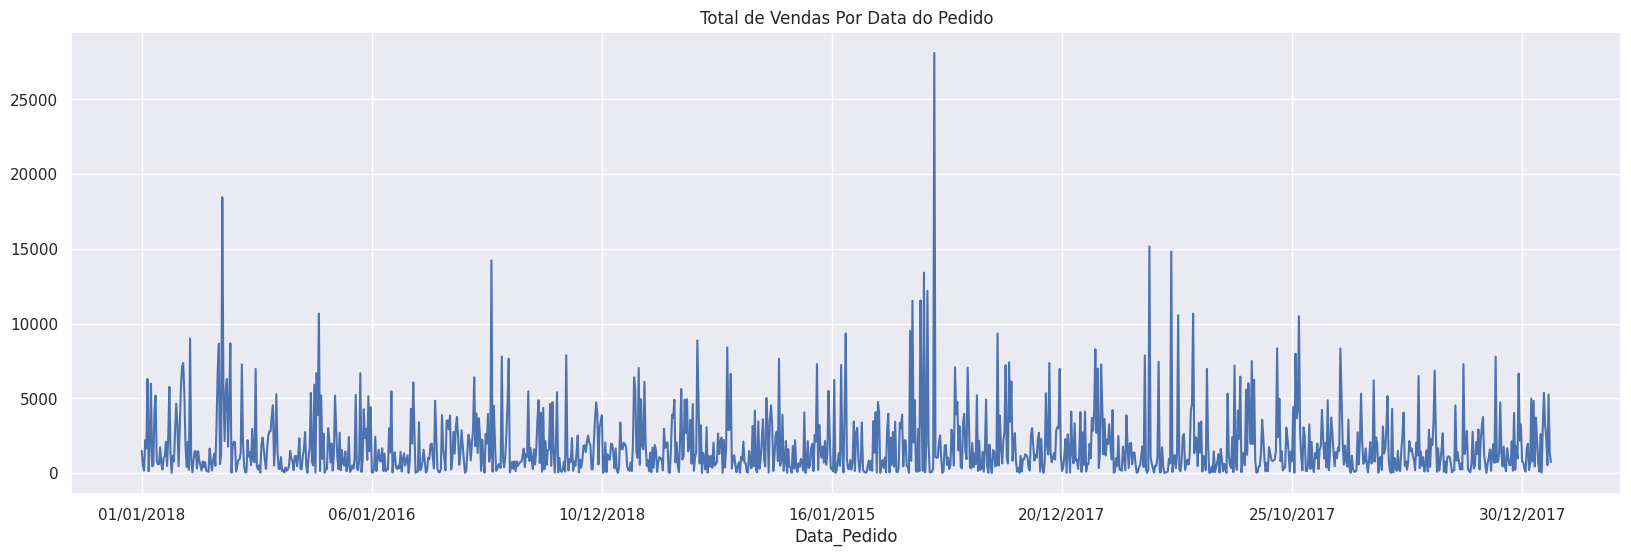

In [ ]:
# Plot
plt.figure(figsize = (20, 6))
df_dsa_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'b')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3: Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras

Solução Vitor

In [ ]:
df_dsa_p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum()
df_dsa_p3.head()

Estado
Alabama        19510.6400
Arizona        35272.6570
Arkansas       11673.8300
California    442927.0975
Colorado       31841.5980
Name: Valor_Venda, dtype: float64

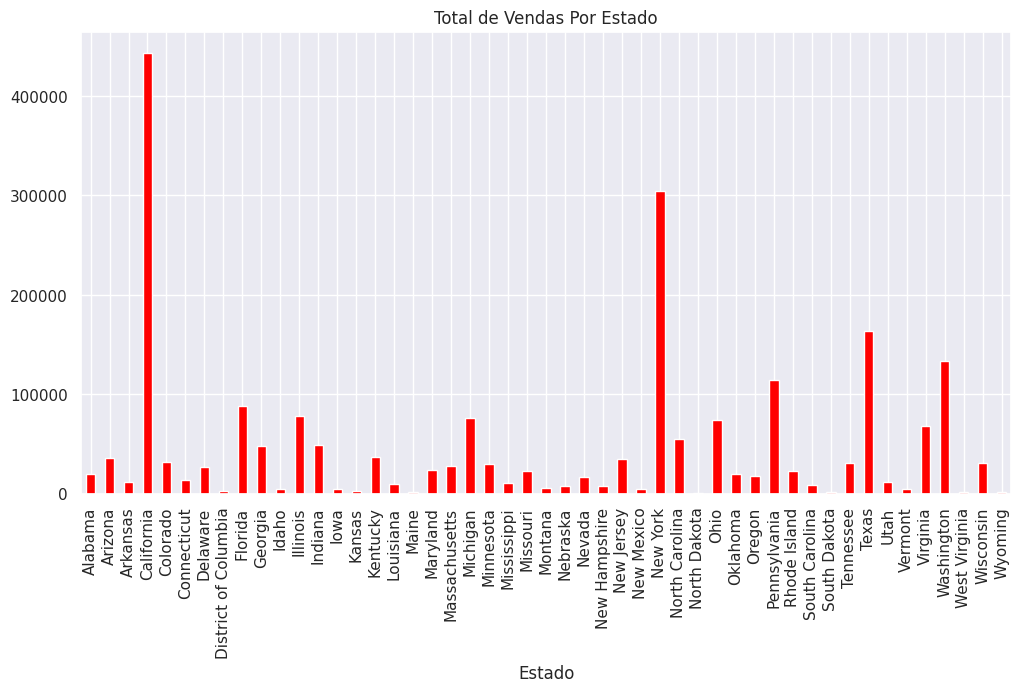

In [ ]:
#plot
plt.figure(figsize = (12, 6))
df_dsa_p3.plot(kind='bar', x='Estado', y='Valor_Venda', color='red')
plt.title('Total de Vendas Por Estado')
plt.show()

Gráfico ordenado por ordem de maior valor para o menor valor

In [ ]:
#Para conferir o resultado:
df_dsa_p3_asc = df_dsa_p3.sort_values(ascending=False)

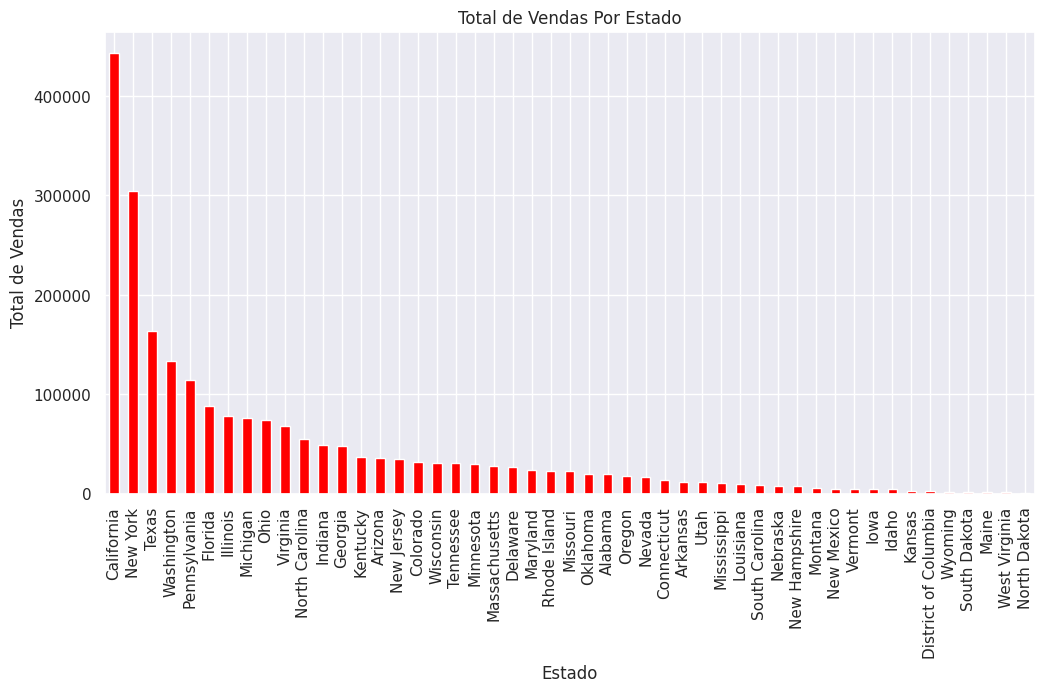

In [ ]:
# Plot (Gráfico de barras)
plt.figure(figsize=(12, 6))
ax = df_dsa_p3_asc.plot(kind='bar', color='red')
ax.set_ylabel('Total de Vendas')
ax.set_title('Total de Vendas Por Estado')
ax.set_xlabel('Estado')
plt.show()

Solução DSA

In [ ]:
# Agrupamos por estado e calculamos o total de vendas
df_dsa_p3_solucao = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()#reset_index deixa o indice reordenado na sequencia adequada

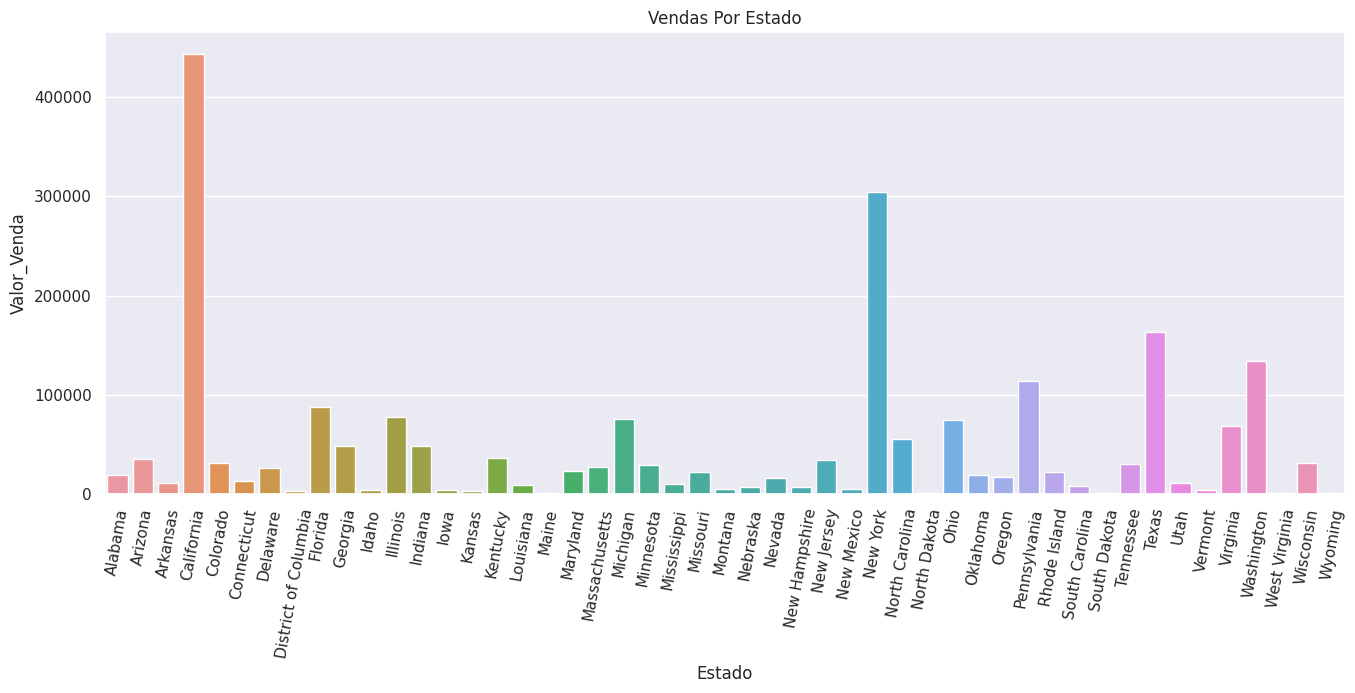

In [ ]:
# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=df_dsa_p3_solucao,
            y='Valor_Venda',
            x='Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation=80)
plt.show()

##Pergunta de Negócio 4: Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

Solução Vitor

In [ ]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
# Filtrar os dados para cidades com maiores vendas
df_dsa_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index()
# Classificar em ordem decrescente pelo total de vendas
df_dsa_p4 = df_dsa_p4.sort_values(by='Valor_Venda', ascending=False)
# Selecionar as 10 cidades com as maiores vendas
top_10_cidades = df_dsa_p4.head(10)
top_10_cidades

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


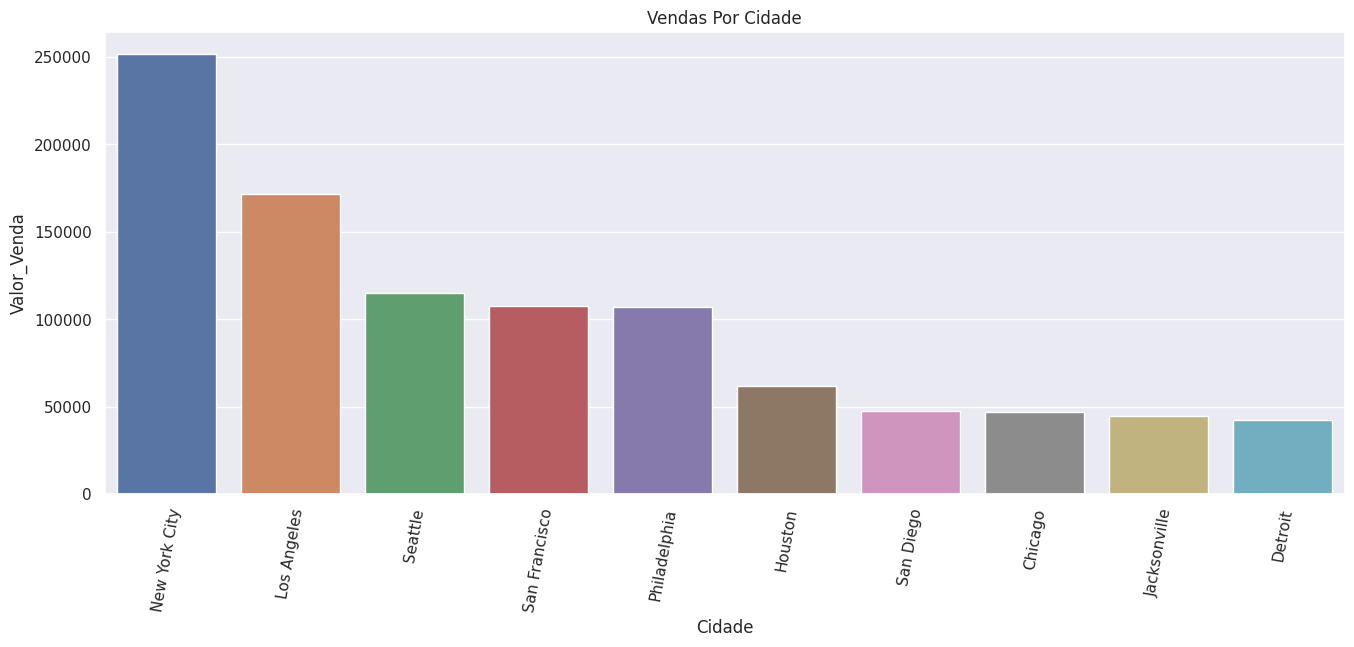

In [ ]:
# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=top_10_cidades,
            y='Valor_Venda',
            x='Cidade').set(title = 'Vendas Por Cidade')
plt.xticks(rotation=80)
plt.show()

Solução DSA:

In [ ]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
df_dsa_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                    ascending = False).head(10)

In [ ]:
df_dsa_p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


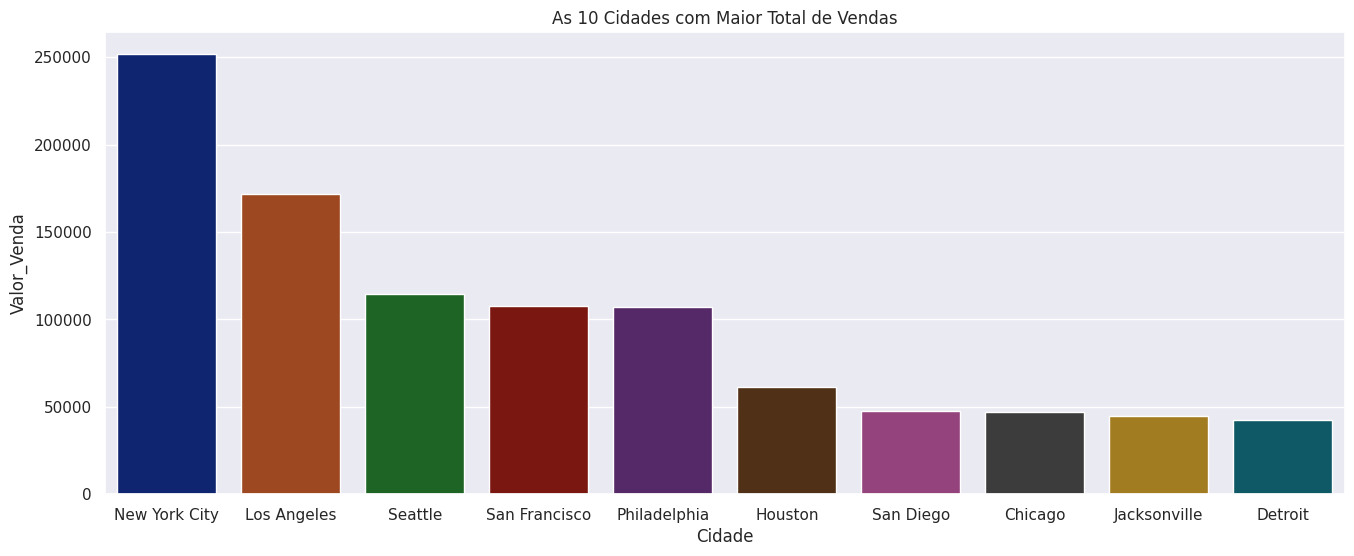

In [ ]:
# Plot
plt.figure(figsize=(16, 6))
sns.set_palette("dark")
sns.barplot(data=df_dsa_p4,
            y='Valor_Venda',
            x='Cidade').set(title='As 10 Cidades com Maior Total de Vendas')
plt.show()

##Pergunta de Negócio 5: Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

Solução Vitor

In [ ]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
df_dsa_p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False).head(5)
df_dsa_p5


,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


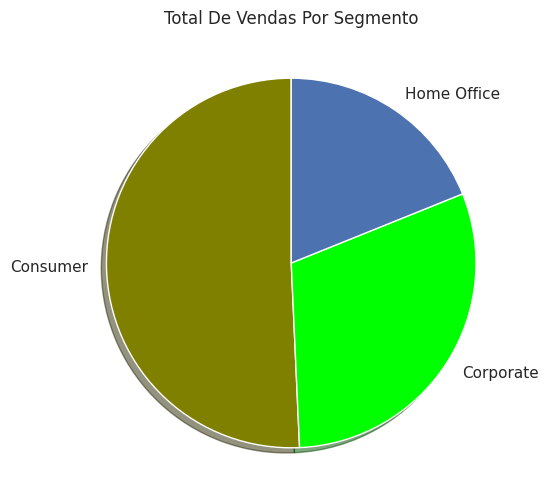

In [ ]:
fatias = df_dsa_p5['Valor_Venda']
segmentos = df_dsa_p5['Segmento']
cores = ['olive', 'lime', 'b']

# Plot
plt.figure(figsize=(16, 6))
plt.pie(fatias, labels=segmentos, colors=cores, startangle=90, shadow=True)
plt.title('Total De Vendas Por Segmento')
# Define a escala dos eixos
plt.show()


##Solução DSA

In [ ]:
# Agrupamos por segmento e calculamos o total de vendas
df_dsa_p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                      ascending = False)
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

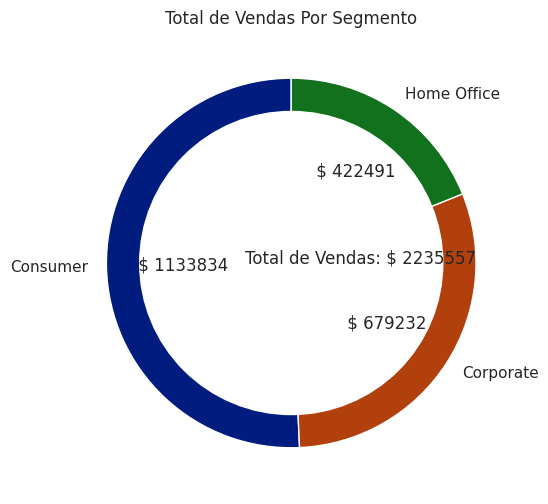

In [ ]:
#plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df_dsa_p5['Valor_Venda'],
        labels = df_dsa_p5['Segmento'],
        autopct = autopct_format(df_dsa_p5['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white') #esta linha abre o gráfico de pizza deixando somente as "bordas"
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()


## Pergunta de Negócio 6 (Desafio Nível Baby): Qual o Total de Vendas Por Segmento e Por Ano?

Solução Vitor

In [ ]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
# Dividir a coluna "Data_Pedido" em dia, mês e ano
df_dsa['Ano'] = df_dsa['Data_Pedido'].str.split('/').str[2]

# Converter a coluna 'Ano' para tipo numérico (caso ainda esteja como string)
df_dsa['Ano'] = df_dsa['Ano'].astype(int)

# Agregar por 'Segmento' e 'Ano' e somar 'Valor_Venda'
df_dsa_p6 = df_dsa.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum().reset_index()

# Classificar os resultados
df_dsa_p6 = df_dsa_p6.sort_values(by='Segmento', ascending=True)

df_dsa_p6


,Segmento,Ano,Valor_Venda
0,Consumer,2015,256719.9166
1,Consumer,2016,265295.2593
2,Consumer,2017,288459.5572
3,Consumer,2018,323359.6019
4,Corporate,2015,125819.5957
5,Corporate,2016,114643.1229
6,Corporate,2017,203266.7398
7,Corporate,2018,235502.7284
8,Home Office,2015,88229.0878
9,Home Office,2016,74134.1332


Solução DSA

In [ ]:
# Convertemos a coluna de data para o tipo datetime para obter o formato adequado
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)#to_datetime = método do pandas
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
Ano                      int64
dtype: object

In [ ]:
# Extraímos o ano criando nova variável
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year
df_dsa.head(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [ ]:
# Total de vendas por segmento e por ano
df_dsa_p6 = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
df_dsa_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

##Pergunta de Negócio 7 (Desafio Nível Júnior): Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:
Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
Quantas Vendas Receberiam 15% de Desconto?

Solução Vitor

In [ ]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [ ]:
# Coluna 'Desconto' com base nas condições
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)

# Vendas 15% de desconto
vendas_15_porcento = len(df_dsa[df_dsa['Desconto'] == 0.15])

# Vendas 10% de desconto
vendas_10_porcento = len(df_dsa[df_dsa['Desconto'] == 0.10])

# Imprima o resultado
print("Quantidade de vendas com 15% de desconto:", vendas_15_porcento)

# Imprima o resultado
print("Quantidade de vendas com 10% de desconto:", vendas_10_porcento)

Quantidade de vendas com 15% de desconto: 457
Quantidade de vendas com 10% de desconto: 9243


Outra forma sem usar a cláusula direta de condicional do numpy

In [ ]:
#'Desconto' com base em condicionais if-else
df_dsa['Desconto'] = 0.10  # Valor padrão de desconto de 10%

for index, row in df_dsa.iterrows():
    if row['Valor_Venda'] > 1000:
        df_dsa.at[index, 'Desconto'] = 0.15

#coluna 'Desconto' com os descontos aplicados

# vendas 15% de desconto
vendas_15_porcento = len(df_dsa[df_dsa['Desconto'] == 0.15])

# resultado
print("Quantidade de vendas com 15% de desconto:", vendas_15_porcento)

Quantidade de vendas com 15% de desconto: 457


Solução DSA

In [ ]:
# Cria uma nova coluna de acordo com a regra definida acima
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)



In [ ]:
# Total por cada valor da variável
df_dsa['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [ ]:
print("Quantidade de vendas que receberiam 15% de desconto: 457")

Quantidade de vendas que receberiam 15% de desconto: 457


Eu faria o print assim:

In [ ]:
contagem_descontos = df_dsa['Desconto'].value_counts()
print("Quantidade de vendas que receberiam 15% de desconto:", contagem_descontos[0.15])

contagem_descontos = df_dsa['Desconto'].value_counts()
print("Quantidade de vendas que receberiam 10% de desconto:", contagem_descontos[0.10])

Quantidade de vendas que receberiam 15% de desconto: 457
Quantidade de vendas que receberiam 10% de desconto: 9243


##Pergunta de Negócio 8 (Desafio Nível Master): Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

Solução Vitor: não adequada

calcula as médias de duas maneiras diferentes: uma média das vendas antes do desconto (usando df_dsa_p8_vendas_antes_desconto.mean()) e uma média das vendas depois do desconto (usando df_dsa_p8_vendas_depois_desconto.mean()). Isso significa que as duas médias são calculadas separadamente com base em diferentes subconjuntos de dados.

In [ ]:
# Coluna 'Valor_Venda_Após_Desconto' com o valor após o desconto
df_dsa['Valor_Venda_Após_Desconto'] = df_dsa['Valor_Venda'] * (1 - df_dsa['Desconto'])

# Média do 'Valor_Venda' antes do desconto
media_valor_venda_antes = df_dsa['Valor_Venda'].mean()

# Média do 'Valor_Venda' após o desconto
media_valor_venda_após = df_dsa['Valor_Venda_Após_Desconto'].mean()

# Resultados
print("Média do Valor de Venda antes do desconto: ", media_valor_venda_antes)
print("Média do Valor de Venda após o desconto: ", media_valor_venda_após)


Média do Valor de Venda antes do desconto:  230.4698922371134
Média do Valor de Venda após o desconto:  202.43640212886598


Solução DSA

In [ ]:
# Criamos uma coluna calculando o valor de venda menos o desconto
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Após_Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,20.13120


In [ ]:
# Filtrando as vendas antes do desconto de 15%
df_dsa_p8_vendas_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']

In [ ]:
# Filtrando as vendas depois do desconto de 15%
df_dsa_p8_vendas_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desconto']


In [ ]:
# Calcula a média das vendas antes do desconto de 15%
media_vendas_antes_desconto = df_dsa_p8_vendas_antes_desconto.mean()

In [ ]:
# Calcula a média das vendas depois do desconto de 15%
media_vendas_depois_desconto = df_dsa_p8_vendas_depois_desconto.mean()

In [ ]:
print("Média das vendas antes do desconto de 15%:", round(media_vendas_antes_desconto, 2))

Média das vendas antes do desconto de 15%: 2116.81


In [ ]:
print("Média das vendas depois do desconto de 15%:", round(media_vendas_depois_desconto, 2))

Média das vendas depois do desconto de 15%: 1799.29


##Pergunta de Negócio 9 (Desafio Nível Master Ninja): Qual a Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.

Solução Vitor:

In [ ]:
# Criar uma cópia do DataFrame original
df_dsa_copia = df_dsa.copy()

# Realizar as operações no DataFrame copiado
df_dsa_copia['Data_Pedido'] = pd.to_datetime(df_dsa_copia['Data_Pedido'], dayfirst=True)
df_dsa_copia['Ano'] = df_dsa_copia['Data_Pedido'].dt.year
df_dsa_copia['Mês'] = df_dsa_copia['Data_Pedido'].dt.month

# Calcular a média de vendas por segmento, ano e mês
df_dsa_p9 = df_dsa_copia.groupby(['Ano', 'Segmento', 'Mês'])['Valor_Venda'].mean().reset_index()

# Renomear a coluna para "Média_Valor_Venda"
df_dsa_p9.rename(columns={'Valor_Venda': 'Média_Valor_Venda'}, inplace=True)

# Definir um índice multinível
df_dsa_p9.set_index(['Ano', 'Segmento', 'Mês'], inplace=True)

# Ordenar o DataFrame por "Segmento" (índice nível 1)
df_dsa_p9 = df_dsa_p9.sort_index(level='Segmento')

display(df_dsa_p9)


Média_Valor_Venda
Ano  Segmento    Mês                   
2015 Consumer    1           146.736787
                 2           117.327926
                 3           152.170564
                 4           189.762750
                 5           191.337439
...                                 ...
2018 Home Office 8           176.160606
                 9           249.140597
                 10          412.576597
                 11          247.519423
                 12          224.523983

[144 rows x 1 columns]

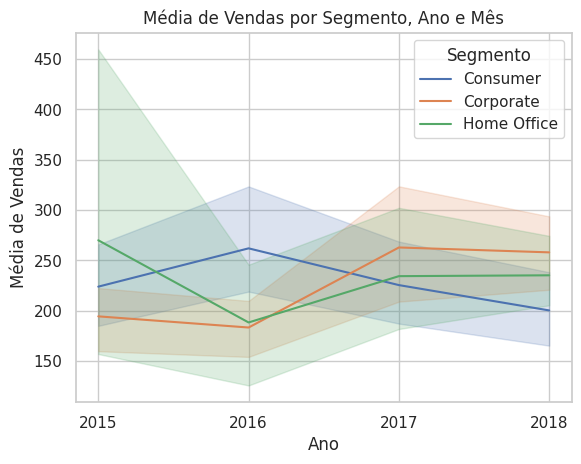

In [ ]:
# Configure o estilo do Seaborn
sns.set(style="whitegrid")

# Resetar o índice do DataFrame para facilitar a plotagem
df_dsa_p9_reset = df_dsa_p9.reset_index()

# Plot
sns.lineplot(data=df_dsa_p9_reset, x='Ano', y='Média_Valor_Venda', hue='Segmento')

# Rótulos do eixo x para exibir apenas os anos inteiros
plt.xticks(df_dsa_p9_reset['Ano'].unique())

# Título e rótulos dos eixos
plt.title("Média de Vendas por Segmento, Ano e Mês")
plt.xlabel("Ano")
plt.ylabel("Média de Vendas")

# Legenda
plt.legend(title='Segmento')

# Exibir gráfico
plt.show()


Solução DSA:

In [ ]:
# Extraímos o mês e gravamos em uma nova variável
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Após_Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,20.13120,10


In [ ]:
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
df_dsa_p9 = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [ ]:
# Vamos extrair os níveis
anos = df_dsa_p9.index.get_level_values(0)
meses = df_dsa_p9.index.get_level_values(1)
segmentos = df_dsa_p9.index.get_level_values(2)

https://seaborn.pydata.org/generated/seaborn.relplot.html

<Figure size 1200x600 with 0 Axes>

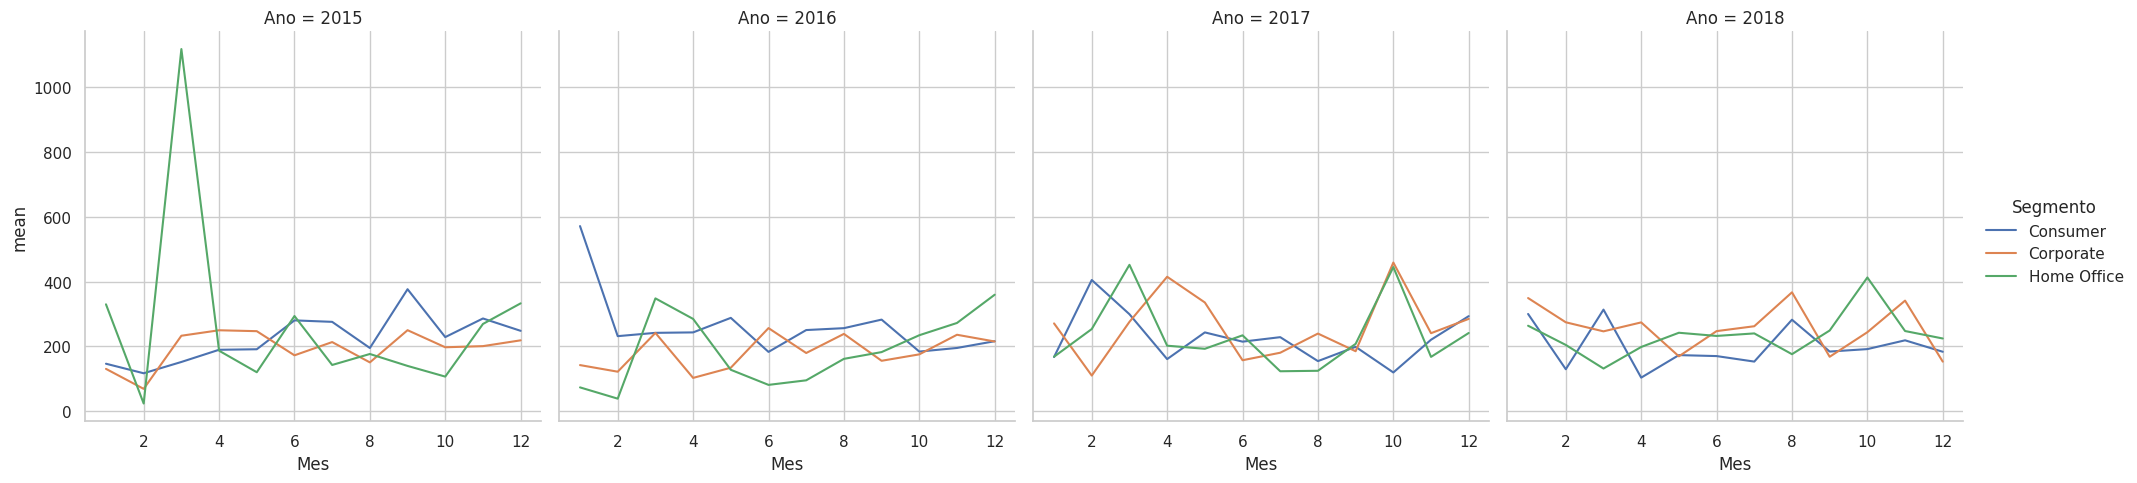

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')  # Define o estilo do Seaborn
fig1 = sns.relplot(
    kind='line',
    data=df_dsa_p9,
    y='mean',
    x=meses,
    hue=segmentos,
    col=anos,
    col_wrap=4
)

# Exibir o gráfico
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias): Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico.

Solução Vitor:

In [ ]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Após_Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,20.13120,10


In [ ]:
# Agrupar por Categoria e SubCategoria e calcular a soma das vendas
df_dsa_p10 = df_dsa.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum()

# Renomear a série resultante
df_dsa_p10 = df_dsa_p10.reset_index(name='Soma_Valor_Venda')

# Ordenar o DataFrame pelas somas de vendas em ordem decrescente
df_dsa_p10 = df_dsa_p10.sort_values(by='Soma_Valor_Venda', ascending=False)

# Selecionar as 12 subcategorias que mais venderam
top_12_subcategorias = df_dsa_p10.head(12)

# Exibir o resultado do DataFrame top_12_subcategorias sem o índice e com a ordem original
print(top_12_subcategorias[['Categoria', 'SubCategoria', 'Soma_Valor_Venda']].to_string(index=False))


      Categoria SubCategoria  Soma_Valor_Venda
     Technology       Phones       325271.2940
      Furniture       Chairs       317919.6250
Office Supplies      Storage       216188.3620
      Furniture       Tables       202083.3600
Office Supplies      Binders       194723.3810
     Technology     Machines       189238.6310
     Technology  Accessories       162791.3620
     Technology      Copiers       146248.0940
      Furniture    Bookcases       108045.0467
Office Supplies   Appliances       104061.6930
      Furniture  Furnishings        88862.7700
Office Supplies        Paper        76312.7640


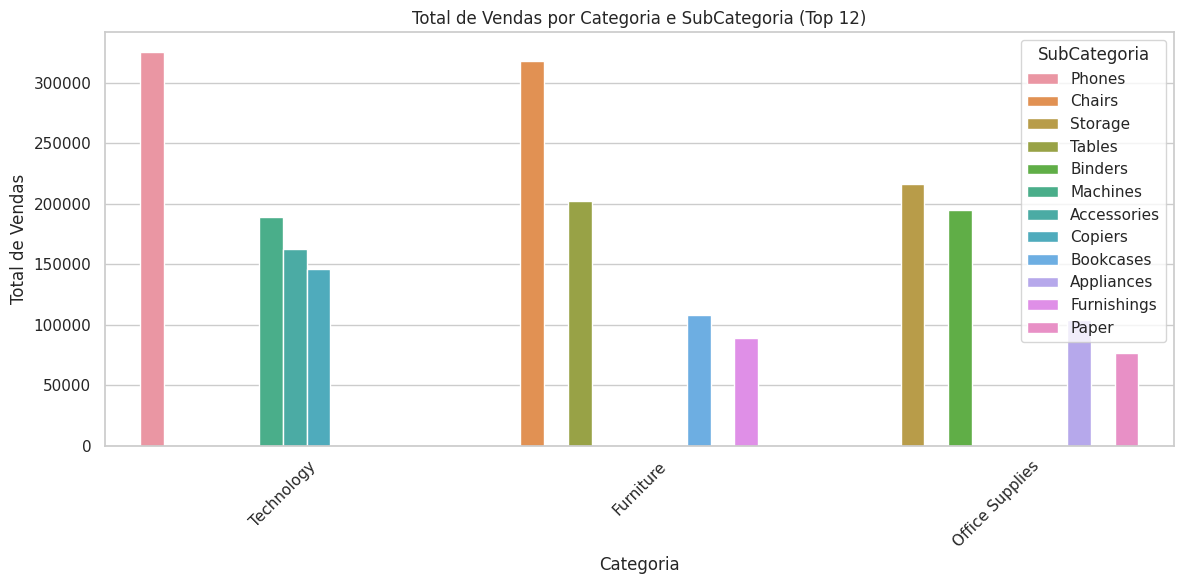

In [ ]:
# Crie um gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
sns.barplot(data=top_12_subcategorias, x='Categoria', y='Soma_Valor_Venda', hue='SubCategoria')
plt.title('Total de Vendas por Categoria e SubCategoria (Top 12)')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.legend(title='SubCategoria', title_fontsize='12')
plt.tight_layout()

# Exiba o gráfico
plt.show()

Solução DSA

In [ ]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
df_dsa_p10 = df_dsa.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)#".sum(numeric_only = True)" faz a soma somente para valor numérico
                                                                                   #depois do agrupamento. Por último ordena o valor_venda em ordem decrescente pegando as 12 primeiras linhas



In [ ]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_dsa_p10 = df_dsa_p10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [ ]:
# Dataframe com categorias e subcategorias
df_dsa_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


Obs: Classificar o item acima por categoria é importante para preencher o gráfico com as subcategorias para cada categoria de forma ordenada.

In [ ]:
# Criamos outro dataframe somente com os totais por categoria
df_dsa_p10_cat = df_dsa_p10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [ ]:
# Dataframe com categorias
df_dsa_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [ ]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Lista de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                      '#aa8cd5',
                      '#aa8cd6',
                      '#aa8cd7',
                      '#26c957',
                      '#26c958',
                      '#26c959',
                      '#26c960',
                      '#e65e65',
                      '#e65e66',
                      '#e65e67',
                      '#e65e68']

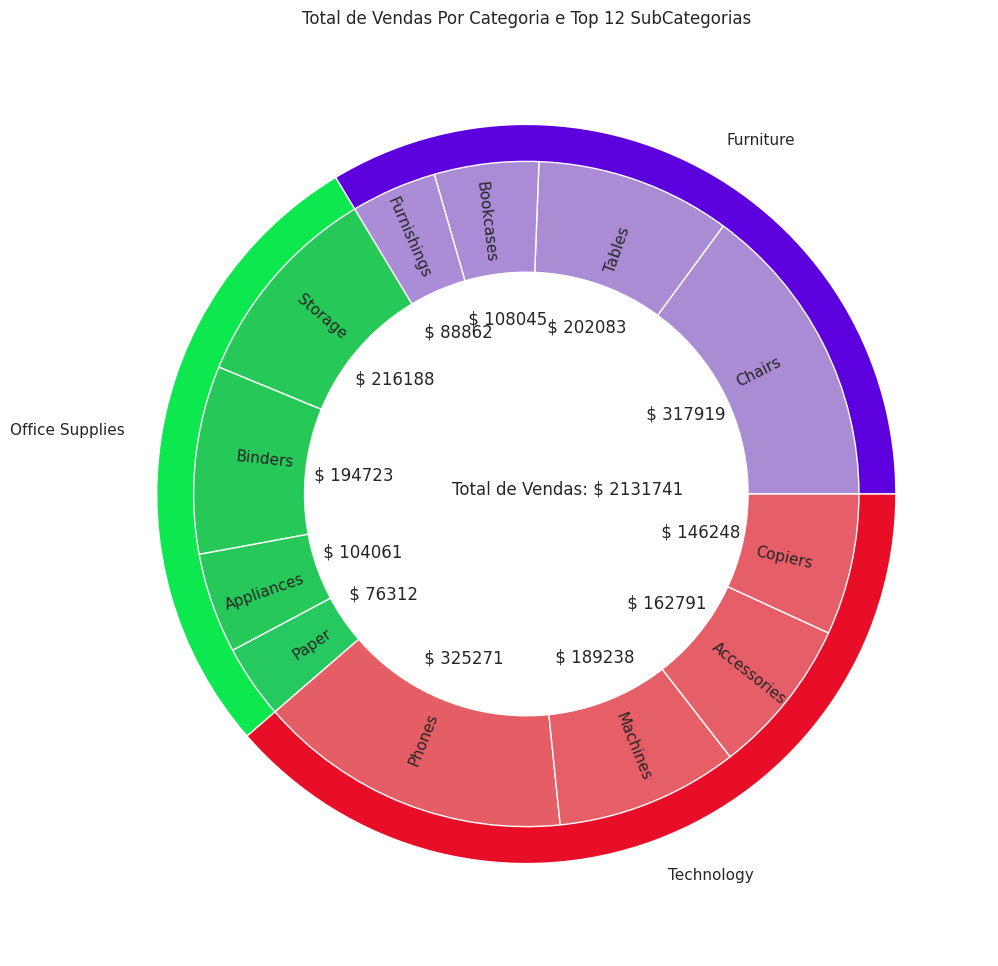

In [ ]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize=(18, 12))

# Gráfico das categorias
p1 = ax.pie(df_dsa_p10_cat['Valor_Venda'],
            radius=1,
            labels=df_dsa_p10_cat['Categoria'],
            wedgeprops=dict(edgecolor='white'),
            colors=cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa_p10['Valor_Venda'],
            radius=0.9,
            labels=df_dsa_p10['SubCategoria'],
            autopct=autopct_format(df_dsa_p10['Valor_Venda']),
            colors=cores_subcategorias,
            labeldistance=0.7,
            wedgeprops=dict(edgecolor='white'),
            pctdistance=0.53,
            rotatelabels=True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc='white')

# Labels e anotações
fig.gca().add_artist(centre_circle)
plt.annotate(text='Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p10['Valor_Venda']))), xy=(-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()